In [1]:
import sys
import os

from sklearn.linear_model import LinearRegression

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli['INEQUALITY']== 'TOT']
    oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values='Value')
    gdp_per_capita.rename(columns={'2015': 'GDP per capita'}, inplace=True)
    gdp_per_capita.set_index('Country', inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
    full_country_stats.sort_values(by='GDP per capita', inplace=True)
    remove_indices = [0,1,6,8,33,34,35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    
    return full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]

In [3]:
datapath = os.path.join('datasets', 'lifesat', '')

In [4]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
import urllib

DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
os.makedirs(datapath, exist_ok=True)

for filename in ('oecd_bli_2015.csv', 'gdp_per_capita.csv'):
    print('Downloading', filename)
    url = DOWNLOAD_ROOT + 'datasets/lifesat/' + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [6]:
oecd_bli = pd.read_csv(datapath + 'oecd_bli_2015.csv', thousands = ',')
gdp_per_capita = pd.read_csv(datapath + 'gdp_per_capita.csv', thousands = ',', delimiter='\t', 
                            encoding='latin1', na_values='n/a')
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

In [7]:
country_stats.sort_values('GDP per capita', ascending=False)

,GDP per capita,Life satisfaction
Country,,
United States,55805.204,7.2
Denmark,52114.165,7.5
Ireland,51350.744,7.0
Australia,50961.865,7.3
Iceland,50854.583,7.5
Sweden,49866.266,7.2
United Kingdom,43770.688,6.8
Austria,43724.031,6.9
Netherlands,43603.115,7.3


In [8]:
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

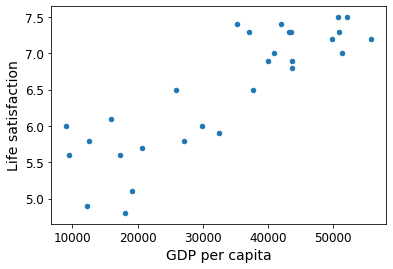

In [9]:
country_stats.plot(x='GDP per capita',y='Life satisfaction', kind='scatter')
plt.show();

In [10]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
X_new = [[22587]]
print(model.predict(X_new))

[[5.96242338]]


In [14]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [15]:
print(model.predict(X_new))

[[5.76666667]]


In [16]:
oecd_bli = pd.read_csv(datapath + 'oecd_bli_2015.csv', thousands=',')
oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']
oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values='Value')
oecd_bli.head(2)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0


In [17]:
oecd_bli['Life satisfaction'].sort_values(ascending=False)

Country
Switzerland        7.5
Denmark            7.5
Iceland            7.5
Norway             7.4
Finland            7.4
Israel             7.4
Australia          7.3
Canada             7.3
Netherlands        7.3
New Zealand        7.3
United States      7.2
Sweden             7.2
Germany            7.0
Ireland            7.0
Brazil             7.0
Austria            6.9
Luxembourg         6.9
Belgium            6.9
United Kingdom     6.8
Mexico             6.7
Chile              6.7
OECD - Total       6.6
Czech Republic     6.5
France             6.5
Spain              6.5
Slovak Republic    6.1
Russia             6.0
Italy              6.0
Japan              5.9
Poland             5.8
Korea              5.8
Slovenia           5.7
Estonia            5.6
Turkey             5.6
Portugal           5.1
Hungary            4.9
Greece             4.8
Name: Life satisfaction, dtype: float64

In [18]:
gdp_per_capita = pd.read_csv(datapath + 'gdp_per_capita.csv', thousands=',', delimiter='\t',
                            encoding='latin1', na_values='n/a')
gdp_per_capita.rename(columns={'2015': 'GDP per capita'}, inplace=True)
gdp_per_capita.set_index('Country', inplace=True)
gdp_per_capita.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


In [19]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values('GDP per capita', inplace=True)
full_country_stats.head(2)

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0


In [20]:
full_country_stats.loc['United States'][['GDP per capita', 'Life satisfaction']]

GDP per capita       55805.2
Life satisfaction        7.2
Name: United States, dtype: object

In [21]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[remove_indices]

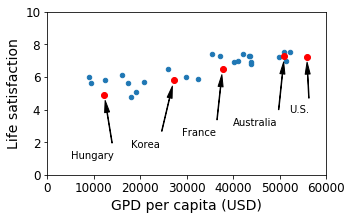

In [22]:
sample_data.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    'Hungary': (5000, 1),
    'Korea': (18000, 1.7),
    'France': (29000, 2.4),
    'Australia': (40000, 3.0),
    'United States': (52000, 3.8),
}

for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = 'U.S.' if country == 'United States' else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
                arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, 'ro')
plt.xlabel('GPD per capita (USD)')
plt.show();

In [23]:
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


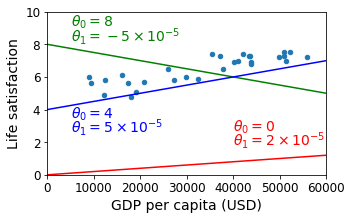

In [24]:
sample_data.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(5,3))
plt.xlabel('GDP per capita (USD)')
plt.axis([0,60000,0,10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, 2*X/100000, 'r')
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")
plt.plot(X, 4 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")
plt.show();

In [25]:
lin1 = LinearRegression()
Xsample = np.c_[sample_data['GDP per capita']]
ysample = np.c_[sample_data['Life satisfaction']]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(4.853052800266436, 4.911544589158484e-05)

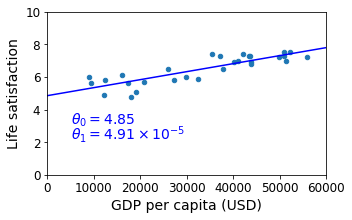

In [26]:
sample_data.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(5,3))
plt.xlabel('GDP per capita (USD)')
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, 'b')
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.show();

In [27]:
cyprus_gdp_per_capita = gdp_per_capita.loc['Cyprus']['GDP per capita']
print(cyprus_gdp_per_capita)
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0][0]
print(cyprus_predicted_life_satisfaction)

22587.49
5.96244744318815


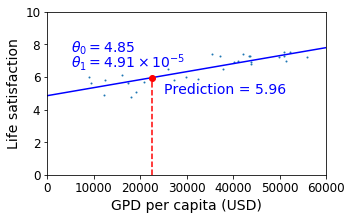

In [28]:
sample_data.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(5,3), s=1)
plt.xlabel('GPD per capita (USD)')
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Prediction = 5.96", fontsize=14, color="b")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")
plt.show();

In [29]:
sample_data[7:10]

,GDP per capita,Life satisfaction
Country,,
Portugal,19121.592,5.1
Slovenia,20732.482,5.7
Spain,25864.721,6.5


In [30]:
(5.1+5.7+6.5)/3

5.766666666666667

In [31]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']
    oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values='Value')
    gdp_per_capita.rename(columns={'2015': 'GDP per capita'}, inplace=True)
    gdp_per_capita.set_index('Country', inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
    full_country_stats.sort_values(by='GDP per capita', inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    
    return full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]

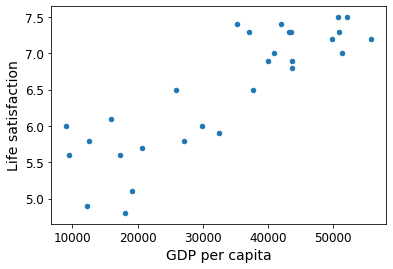

In [32]:
oecd_bli = pd.read_csv(datapath + 'oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv(datapath + 'gdp_per_capita.csv', thousands=',', delimiter='\t',
                            encoding='latin1', na_values='n/a')

country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show();

In [33]:
model = LinearRegression()
model.fit(X, y)
X_new = [[22587]]
print(model.predict(X_new))

[[5.96242338]]


In [34]:
position_text2 = {
    'Brazil': (1000, 9.0),
    'Mexico': (11000, 9.0),
    'Chile': (25000, 9.0),
    'Czech Republic': (35000, 9.0),
    'Norway': (60000, 3),
    'Switzerland': (72000, 3.0),
    'Luxembourg': (90000, 3.0),
}

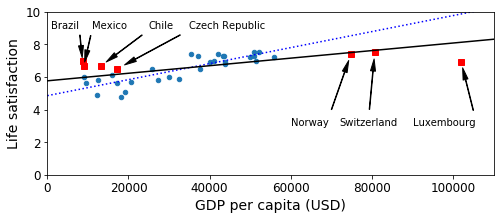

In [37]:
sample_data.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X=np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1*X, "b:")

lin_reg_full = LinearRegression()
Xfull = np.c_[full_country_stats["GDP per capita"]]
yfull = np.c_[full_country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "k")
plt.xlabel("GDP per capita (USD)")
plt.show();

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/opt/tljh/user/lib/python3.6/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


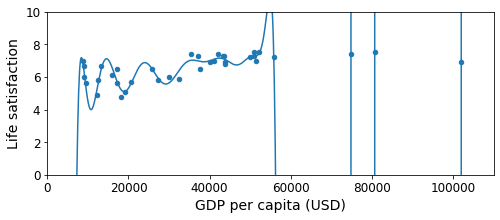

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

full_country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])
poly = PolynomialFeatures(degree=60, include_bias=False)
scaler = StandardScaler()
lin_reg2 = LinearRegression()
pipeline_reg = Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
plt.xlabel("GDP per capita (USD)")
plt.show();

In [47]:
full_country_stats.loc[[c for c in full_country_stats.index if 'W' in c.upper()]]['Life satisfaction']

Country
New Zealand    7.3
Sweden         7.2
Norway         7.4
Switzerland    7.5
Name: Life satisfaction, dtype: float64

In [51]:
gdp_per_capita.loc[[c for c in gdp_per_capita.index if 'W' in c.upper()]].head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Botswana,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6040.957,2008.0
Kuwait,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",29363.027,2014.0
Malawi,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",354.275,2011.0
New Zealand,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",37044.891,2015.0
Norway,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",74822.106,2015.0


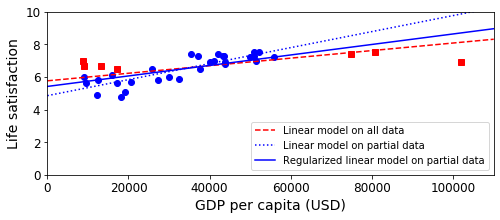

In [53]:
from sklearn.linear_model import Ridge

plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(sample_data["GDP per capita"]), list(sample_data["Life satisfaction"]), "bo")
plt.plot(list(missing_data["GDP per capita"]), list(missing_data["Life satisfaction"]), "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "r--", label="Linear model on all data")
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")

ridge = Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
ridge.fit(Xsample, ysample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b", label="Regularized linear model on partial data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.xlabel("GDP per capita (USD)")
plt.show();

In [58]:
# model = LinearRegression()
model = KNeighborsRegressor(n_neighbors=3)

In [56]:
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

In [59]:
model.fit(X, y)

X_new = np.array([[22587.0]])
print(model.predict(X_new))

[[5.76666667]]
